In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import make_interp_spline, CubicSpline, interp1d


In [12]:
df = pd.read_excel("E:/data.xlsx")
df

,RING,Roving,Draw,Draw2,Card,RING2,Roving2,Draw3,Card2,RING3,Roving3,Draw4,Card3
0,12,0.6,0.10,0.10,0.10,20.0,0.8,0.10,0.10,10.0,0.6,0.10,0.10
1,16,0.7,0.11,0.11,0.11,30.0,1.0,0.12,0.12,20.0,0.8,0.10,0.10
2,20,0.8,0.11,0.11,0.11,40.0,1.3,0.14,0.14,30.0,1.0,0.12,0.12
3,30,0.9,0.12,0.12,0.12,50.0,1.6,0.16,0.16,40.0,1.4,0.14,0.14
4,40,1.3,0.12,0.12,0.12,NaN,NaN,NaN,NaN,50.0,1.6,0.16,0.16
5,50,1.3,0.13,0.13,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


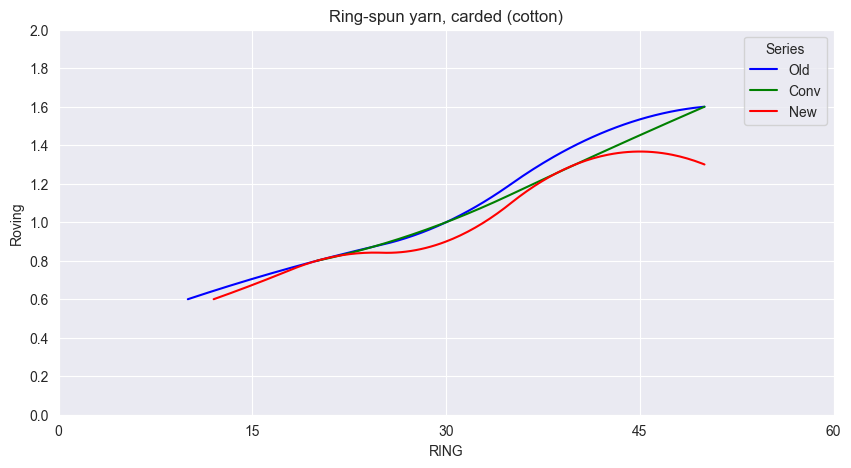

In [13]:
sns.set_style('darkgrid')
old_x_smooth = np.linspace(df['RING3'].min(), df['RING3'].max(), 200)
conv_x_smooth = np.linspace(df['RING2'].min(), df['RING2'].max(), 200)
new_x_smooth = np.linspace(df['RING'].min(), df['RING'].max(), 200)

# Smooth y-values for each series
old_spl = make_interp_spline(df['RING3'].dropna(), df['Roving3'].dropna(), k=2)
conv_spl = make_interp_spline(df['RING2'].dropna(), df['Roving2'].dropna(), k=2)
new_spl = make_interp_spline(df['RING'].dropna(), df['Roving'].dropna(), k=2)

old_y_smooth = old_spl(old_x_smooth)
conv_y_smooth = conv_spl(conv_x_smooth)
new_y_smooth = new_spl(new_x_smooth)

# Plot each line with labels and colors
plt.figure(figsize=(10, 5))
plt.plot(old_x_smooth, old_y_smooth, label='Old', color='blue')
plt.plot(conv_x_smooth, conv_y_smooth, label='Conv', color='green')
plt.plot(new_x_smooth, new_y_smooth, label='New', color='red')

# Add titles and labels
plt.title('Ring-spun yarn, carded (cotton)')
plt.xlabel('RING')
plt.ylabel('Roving')
plt.xticks(np.linspace(0, 60, 5))
plt.yticks(np.linspace(0, 2, 11))

# Add legend
plt.legend(title="Series")

# Display plot
plt.show()

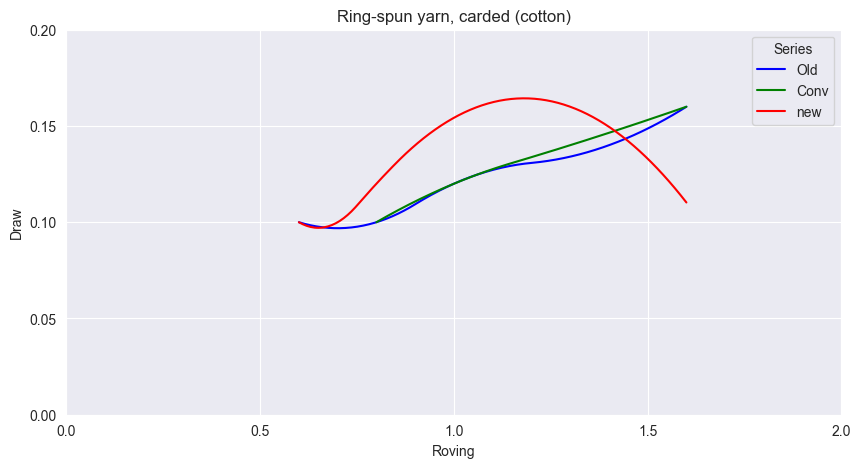

In [14]:
old_x_smooth = np.linspace(df['Roving3'].min(), df['Roving3'].max(), 200)
conv_x_smooth = np.linspace(df['Roving2'].min(), df['Roving2'].max(), 200)
new_x_smooth = np.linspace(df['Roving'].min(), df['Roving2'].max(), 200)

# Smooth y-values for each series
old_spl = make_interp_spline(df['Roving3'].dropna(), df['Draw4'].dropna(), k=2)
conv_spl = make_interp_spline(df['Roving2'].dropna(), df['Draw3'].dropna(), k=2)
new_spl = make_interp_spline(df['Roving'].drop_duplicates(), df['Draw4'][:5], k=2)

old_y_smooth = old_spl(old_x_smooth)
conv_y_smooth = conv_spl(conv_x_smooth)
new_y_smooth = new_spl(new_x_smooth)

# Plot each line with labels and colors
plt.figure(figsize=(10, 5))
plt.plot(old_x_smooth, old_y_smooth, label='Old', color='blue')
plt.plot(conv_x_smooth, conv_y_smooth, label='Conv', color='green')
plt.plot(new_x_smooth, new_y_smooth, label='new', color='red')

# plt.plot(df['Roving'], df['Draw'], label='New', color='red')

# Add titles and labels
plt.title('Ring-spun yarn, carded (cotton)')
plt.xlabel('Roving')
plt.ylabel('Draw')
plt.xticks(np.linspace(0, 2, 5))
plt.yticks(np.linspace(0, 0.2, 5))

# Add legend
plt.legend(title="Series")

# Display plot
plt.show()

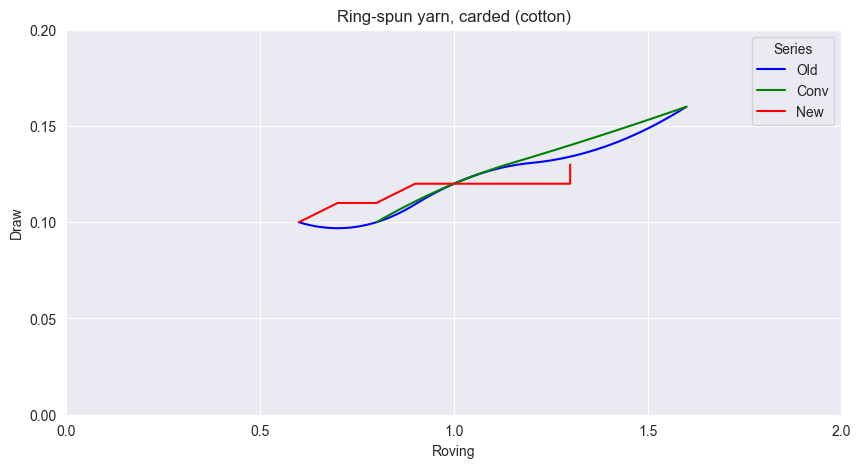

In [15]:
old_x_smooth = np.linspace(df['Roving3'].min(), df['Roving3'].max(), 200)
conv_x_smooth = np.linspace(df['Roving2'].min(), df['Roving2'].max(), 200)

# Smooth y-values for each series
old_spl = make_interp_spline(df['Roving3'].dropna(), df['Draw4'].dropna(), k=2)
conv_spl = make_interp_spline(df['Roving2'].dropna(), df['Draw3'].dropna(), k=2)

old_y_smooth = old_spl(old_x_smooth)
conv_y_smooth = conv_spl(conv_x_smooth)

# Plot each line with labels and colors
plt.figure(figsize=(10, 5))
plt.plot(old_x_smooth, old_y_smooth, label='Old', color='blue')
plt.plot(conv_x_smooth, conv_y_smooth, label='Conv', color='green')
plt.plot(df['Roving'], df['Draw'], label='New', color='red')

# Add titles and labels
plt.title('Ring-spun yarn, carded (cotton)')
plt.xlabel('Roving')
plt.ylabel('Draw')
plt.xticks(np.linspace(0, 2, 5))
plt.yticks(np.linspace(0, 0.2, 5))

# Add legend
plt.legend(title="Series")

# Display plot
plt.show()

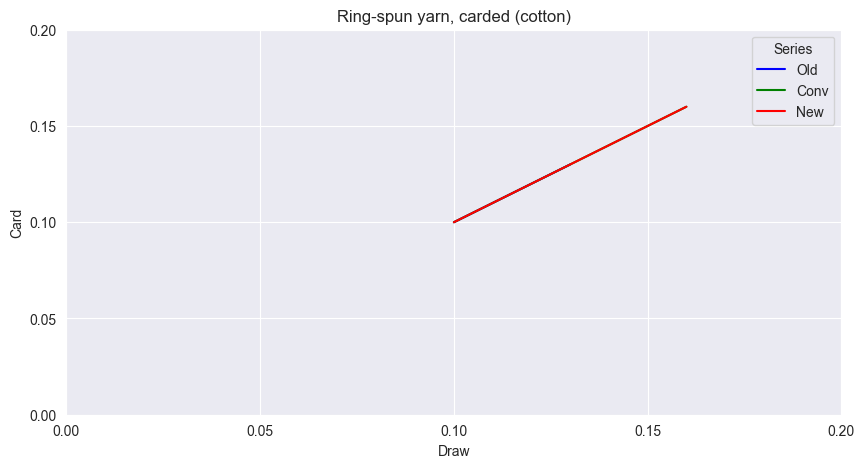

In [16]:
old_x_smooth = np.linspace(df['Draw'].min(), df['Draw'].max(), 200)
conv_x_smooth = np.linspace(df['Draw3'].min(), df['Draw3'].max(), 200)

# Smooth y-values for each series
old_spl = make_interp_spline(df['Draw'].drop_duplicates(), df['Card'].drop_duplicates(), k=2)
conv_spl = make_interp_spline(df['Draw3'].dropna(), df['Card2'].dropna(), k=2)

old_y_smooth = old_spl(old_x_smooth)
conv_y_smooth = conv_spl(conv_x_smooth)

# Plot each line with labels and colors
plt.figure(figsize=(10, 5))
plt.plot(old_x_smooth, old_y_smooth, label='Old', color='blue')
plt.plot(conv_x_smooth, conv_y_smooth, label='Conv', color='green')
plt.plot(df['Draw4'], df['Card3'], label='New', color='red')

# Add titles and labels
plt.title('Ring-spun yarn, carded (cotton)')
plt.xlabel('Draw')
plt.ylabel('Card')
plt.xticks(np.linspace(0, 0.2, 5))
plt.yticks(np.linspace(0, 0.2, 5))

# Add legend
plt.legend(title="Series")

# Display plot
plt.show()